ASSIGNMENT 1: IMAGE AUGMENTATION GROUP WORK

In [7]:
# IMPORTS

import tensorflow as tf
from tensorflow.keras import datasets

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

import matplotlib.pyplot as plt
import numpy as np

TRANSFORMATIONS  & IMAGE AUGMENTATION TECHNIQUES TO PERFORM ON THE DATA

In [ ]:
# Transformation on Original Dataset
transform_original = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Augmentation Techniques to be used
transform_augmented = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.RandomCrop(32, padding=4),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.GaussianBlur(kernel_size=(3,3)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

LOADING ORIGINAL DATASET AND PERFORMING AUGMENTATION

In [9]:
# Load CIFAR-10 dataset
batch_size = 64

# Original Dataset 
trainset_original = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_original)
trainloader_original = torch.utils.data.DataLoader(trainset_original, batch_size=batch_size, shuffle=True)

# Augmented Dataset
trainset_augmented = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_augmented)
trainloader_augmented = torch.utils.data.DataLoader(trainset_augmented, batch_size=batch_size, shuffle=True)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform_original)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False)

100.0%


VISUALIZING THE ORIGINAL IMAGES VS THE AUGMENTED IMAGES USING A FUNCTION

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.9843137].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.88235295..0.6392157].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.9529412].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.99215686..0.64705884].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.8980392..0.84313726].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.92156863..0.67058825].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.8745098..0.7

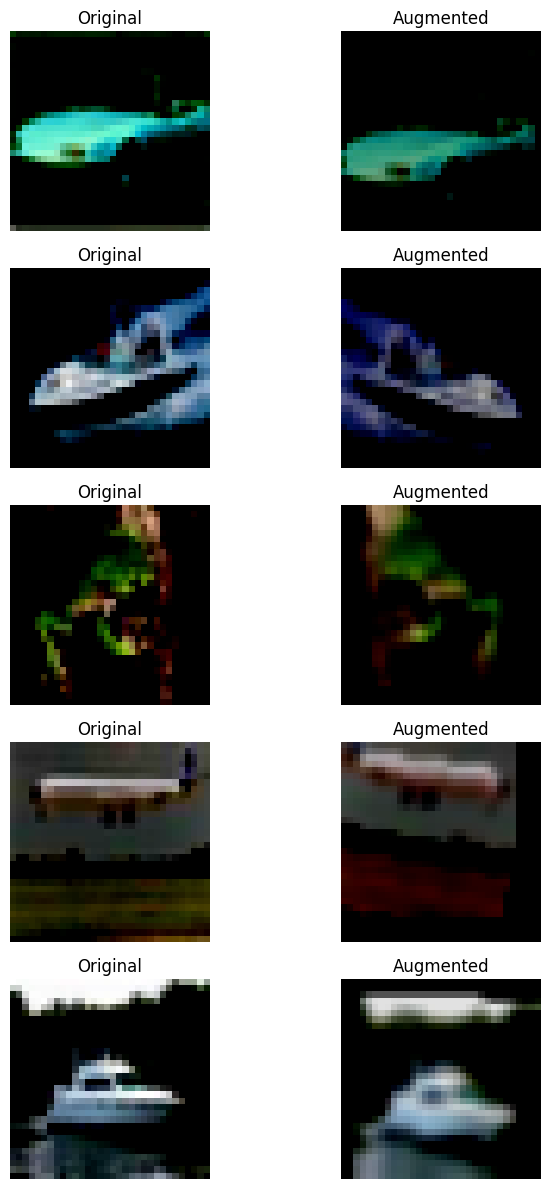

In [24]:
def visualize_augmentations(dataset_original, dataset_augmented, num_images=5):
    fig, axes = plt.subplots(num_images, 2, figsize=(8, 12))
    for i in range(num_images):
        index = np.random.randint(len(dataset_original))
        original_img, _ = dataset_original[index]
        augmented_img, _ = dataset_augmented[index]
        
        axes[i, 0].imshow(np.transpose(original_img.numpy(), (1, 2, 0)))
        axes[i, 0].set_title("Original")
        axes[i, 0].axis("off")
        
        axes[i, 1].imshow(np.transpose(augmented_img.numpy(), (1, 2, 0)))
        axes[i, 1].set_title("Augmented")
        axes[i, 1].axis("off")
    plt.tight_layout()
    plt.show()

visualize_augmentations(trainset_original, trainset_augmented)

CNN MODEL USING CNN CLASS

In [12]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(64 * 8 * 8, 128)
        self.fc2 = nn.Linear(128, 10)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))
        x = x.view(-1, 64 * 8 * 8)
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

DEFINING A FUNCTION TO TRAIN THE CNN MODEL ON BOTH THE ORIGINAL AND AUGMENTED DATASETS

In [13]:
def train_model(model, trainloader, epochs=10):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    losses = []
    
    for epoch in range(epochs):
        running_loss = 0.0
        for images, labels in trainloader:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        avg_loss = running_loss / len(trainloader)
        losses.append(avg_loss)
        print(f'Epoch {epoch+1}, Loss: {avg_loss:.4f}')
    print('Training complete')
    return losses


In [14]:
print("Training on original dataset...")
model_original = CNN()
losses_original = train_model(model_original, trainloader_original)

print("Training on augmented dataset...")
model_augmented = CNN()
losses_augmented = train_model(model_augmented, trainloader_augmented)

Training on original dataset...
Epoch 1, Loss: 1.3056
Epoch 2, Loss: 0.9294
Epoch 3, Loss: 0.7716
Epoch 4, Loss: 0.6554
Epoch 5, Loss: 0.5482
Epoch 6, Loss: 0.4438
Epoch 7, Loss: 0.3538
Epoch 8, Loss: 0.2733
Epoch 9, Loss: 0.2090
Epoch 10, Loss: 0.1524
Training complete
Training on augmented dataset...
Epoch 1, Loss: 1.6888
Epoch 2, Loss: 1.4287
Epoch 3, Loss: 1.3153
Epoch 4, Loss: 1.2427
Epoch 5, Loss: 1.1955
Epoch 6, Loss: 1.1609
Epoch 7, Loss: 1.1290
Epoch 8, Loss: 1.1068
Epoch 9, Loss: 1.0821
Epoch 10, Loss: 1.0640
Training complete


DEFINING A FUNCTION TO EVALUATE MODEL PERFORMANCE FOR BOTH DATASETS 

In [15]:
def evaluate_model(model, testloader):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in testloader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = 100 * correct / total
    print(f'Accuracy: {accuracy:.2f}%')
    return accuracy

EVALUATING THE PERFORMANCE

In [16]:
evaluate_model(model_original, testloader)
evaluate_model(model_augmented, testloader)

Accuracy: 72.21%
Accuracy: 65.89%


65.89

PLOTTING & VISUALIZING THE LOSS CURVES

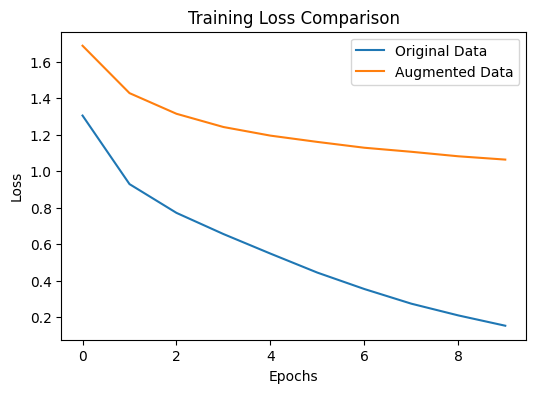

In [18]:
def plot_loss_curves(losses_original, losses_augmented):
    plt.figure(figsize=(6,4))
    plt.plot(losses_original, label='Original Data')
    plt.plot(losses_augmented, label='Augmented Data')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training Loss Comparison')
    plt.legend()
    plt.show()


plot_loss_curves(losses_original, losses_augmented)